In [9]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

In [20]:
unique_customers = invoices_df['customer_id'].nunique()
unique_customers

5191

In [12]:
unique_categories = invoices_df['category'].nunique()
unique_categories

8

In [13]:
popular_payment = invoices_df['payment_method'].value_counts().idxmax()
usage_count = invoices_df['payment_method'].value_counts().max()
popular_payment, usage_count

('Cash', 44447)

In [37]:
popular_categories = invoices_df.groupby('category')['price'].sum().nlargest(3)
popular_categories

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

In [9]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")


merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
filtered_df = merged_df[merged_df['age'] > 45]
total_sales = filtered_df['price'].sum()
print("Total sales attributed to customers over the age of 45:", total_sales)


Total sales attributed to customers over the age of 45: 22370553.27


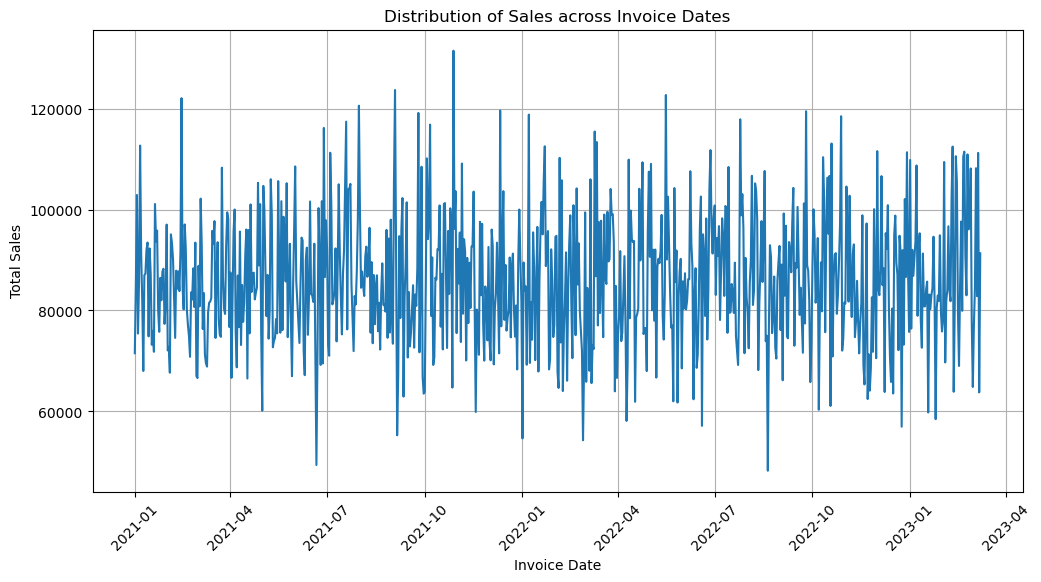

Interpreting the trend:
The graph shows a positive trend with an average sales growth rate of 0.08%, indicating increasing sales over time.
Additionally, it is recommended to analyze the data further to identify any specific seasonal patterns or fluctuations in sales across different invoice dates.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")

# Convert 'invoice_date' column to datetime with specified format
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], format='%d/%m/%Y')

# Group the data by invoice date and calculate total sales for each date
daily_sales = invoices_df.groupby('invoice_date')['price'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales across Invoice Dates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze the trend in the graph
seasonal_trend = daily_sales.resample('M').mean()

# Calculate the average sales growth rate
average_growth_rate = seasonal_trend.pct_change().mean()

# Explain the trend in the graph
print("Interpreting the trend:")
if average_growth_rate > 0:
    print("The graph shows a positive trend with an average sales growth rate of {:.2%}, indicating increasing sales over time.".format(average_growth_rate))
elif average_growth_rate < 0:
    print("The graph shows a negative trend with an average sales decline rate of {:.2%}, indicating decreasing sales over time.".format(abs(average_growth_rate)))
else:
    print("The graph shows a relatively stable trend with no significant average sales growth rate, indicating consistent sales over time.")
print("Additionally, it is recommended to analyze the data further to identify any specific seasonal patterns or fluctuations in sales across different invoice dates.")

In [17]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
merged_df['decade_age_range'] = (merged_df['age'] // 10) * 10
pivot_table = merged_df.pivot_table(values='price', index='category', columns='decade_age_range', aggfunc='sum')
print(pivot_table)

decade_age_range       10.0        20.0        30.0        40.0        50.0  \
category                                                                      
Books               3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing          518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics          29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage     3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes             274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir            3296.13    15295.92    17548.08    17759.22    15084.78   
Technology        287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys               17203.20   102466.56   115297.28   106910.72    94115.84   

decade_age_range        60.0        70.0        80.0  
category                                              
Books               21513.00    15437.85     7575.00  
Clothing          2910776.00  2117064.40  12